# Q1.1 Create your myknn_regressor based on the skeleton.

### 首先將test和train資料逐一取出並利用歐幾里德距離法計算兩筆資料的距離，而後找出依距離近到遠排序的索引，再使用這個索引找出train的label資料集前n_neighbors筆，最後依照mean_type類型預測出年份

In [1]:
import numpy as np

class myknn_regressor():
    def __init__(self, n_neighbors=10, mean_type="equal_weight"):
        """mean_type can be equal_weight or remove_outliers.
                              equal_weight use the same weight for all neighbors.
                              remove_outliers remove neighbors out in [Q1 - 1.5 IQR, Q3 + 1.5IQR]."""
        self.k = n_neighbors
        self.mean_type = mean_type

    def fit(self, x_train, y_train):
        ### Add your code here ###
        self.x_train = x_train.copy()
        self.y_train = y_train.copy()

    def predict(self, x_test):
        """use remove_outliers only if k>=10"""
        ### Add your code here ###
        ypred_total = []
        for i in range(len(x_test)):
            dist = []
            for j in range(len(self.x_train)):
                dist.append(np.sqrt(np.sum((x_test[i] - self.x_train[j]) ** 2)))
            label_idx = np.argsort(dist)[:self.k]
            feature_y = self.y_train[label_idx]
            if self.mean_type == 'equal_weight':
                ypred = self.fuction_equal(feature_y)
            else:
                ypred = self.fuction_remove(feature_y)
            ypred_total.append(ypred)

        return ypred_total

    @staticmethod
    def fuction_equal(feature_y):
        return np.sum(feature_y) / len(feature_y)

    @staticmethod
    def fuction_remove(feature_y):
        first_quantile, third_quantile = np.percentile(feature_y, [25, 75])
        IQR = third_quantile - first_quantile
        left_bound = first_quantile - 1.5 * IQR
        right_bound = third_quantile + 1.5 * IQR
        return feature_y[(left_bound <= feature_y) & (feature_y <= right_bound)].mean()
    
##將計算rmse額外寫成一個function   
def calc_rmse(ypred, ytest):
    return np.power(np.sum((ypred - ytest) ** 2) / len(ypred), 0.5)

# Q1.2 Load data from msd_data1.pickle. You should standardize all feature values to have a zero mean and unit variance before training a KNN model. Make predictions using  𝑘=20  and "equal_weight"  𝑓 . List the RMSE and the first 20 predictions in the test data.

In [2]:
import pickle
from sklearn import preprocessing
import numpy as np

np.set_printoptions(suppress=True)
# Load data
with open('data/msd_data1.pickle', 'rb') as fh1:
    msd_data = pickle.load(fh1)

doscaling = 1

if (doscaling == 1):
    xscaler = preprocessing.StandardScaler().fit(msd_data['X_train'])
    # standardize feature values
    X_train = xscaler.transform(msd_data['X_train'])
    X_test = xscaler.transform(msd_data['X_test'])
else:
    X_train = msd_data['X_train']
    X_test = msd_data['X_test']

Y_train = msd_data['Y_train']
Y_test = msd_data['Y_test']

c:\Users\rober\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### 使用標準化資料和equal_weight方法進行預測

In [3]:
myknn = myknn_regressor(20, "equal_weight")
myknn.fit(X_train, Y_train)
ypred = myknn.predict(X_test)
rmse=calc_rmse(ypred,Y_test)

print(f'first 20 predictions in the test data : {ypred[:20]}')
print(f'RMSE of the test data : {rmse}')

first 20 predictions in the test data : [1993.35, 1993.8, 2000.65, 1991.5, 1992.8, 1998.5, 1988.1, 1991.65, 2002.25, 2003.0, 2000.5, 1998.65, 1995.55, 1997.2, 1995.05, 1997.4, 1992.15, 2000.45, 2003.2, 1995.75]
RMSE of the test data : 10.25126451549596


# Q1.3 Load data from msd_data1.pickle. Standardized all feature values so that all features have a zero mean and unit variance. Make predictions using  𝑘=20  and "remove_outier"  𝑓 . List the RMSE and the first 20 predictions in the testing data.

### 使用標準化資料和remove_outier方法進行預測

In [5]:
myknn = myknn_regressor(20, "remove_outliers")
myknn.fit(X_train, Y_train)
ypred = myknn.predict(X_test)
rmse=calc_rmse(ypred,Y_test)

print(f'first 20 predictions in the test data : {ypred[:20]}')
print(f'RMSE of the test data : {rmse}')

first 20 predictions in the test data : [1993.35, 1993.8, 2000.65, 1992.7368421052631, 1992.8, 2000.0, 1988.1, 1991.65, 2002.25, 2003.9473684210527, 2000.5, 2000.9444444444443, 1995.55, 1997.2, 1998.611111111111, 1997.4, 1992.15, 2003.8333333333333, 2003.2, 1995.75]
RMSE of the test data : 10.212572466080376


# Q1 小結:
#### 可看出remove_outier比equal_weight的RMSE來的小，推測原因可能是排除特別近或特別遠的資料，使得資料都聚集在中央，因此誤差會比較小

# Q2 Compute the RMSE on the testing dataset using  𝑘=1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,80,100,120,140,160,180,200 . In the first case, all feature values are standardized to have unit variances and zero means. As for the second case, do not apply feature scaling. The third case uses standardized features and adopted myknn_regressor with "remove_outlier"  𝑓  to make predictions.
# For each setting, plot a curve that shows the relations between  𝑘  (x-axis) and RMSE (y-axis). If possible, plot the three curves in the same figure to visually inspect their dynamics. Discuss your observations.

### 分成三個Example說明:
###  Example 1 : 使用sklearn模組做出KNeighborsRegressor並且使用標準化資料
###  Example 2 : 使用sklearn模組做出KNeighborsRegressor但不使用標準化資料
###  Example 3 : 使用前一題手刻的KNeighborsRegressor並且使用標準化資料

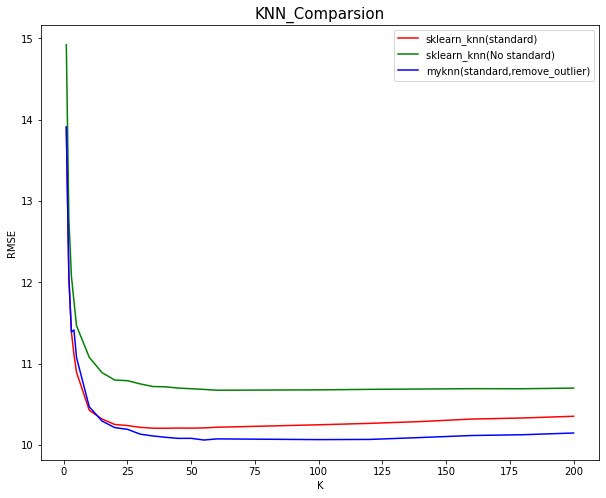

In [9]:
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

test_k=[1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,100,120,140,160,180,200]
plt.figure(figsize=(10,8))

##Example1

xscaler = preprocessing.StandardScaler().fit(msd_data['X_train'])
#standardize feature values
X_train = xscaler.transform(msd_data['X_train'])
X_test = xscaler.transform(msd_data['X_test'])

rmse_sklearn_standard=[]
for k in test_k:
    myknn=KNeighborsRegressor(k)
    myknn.fit(X_train,Y_train)
    ypred=myknn.predict(X_test)
    rmse_sklearn_standard.append(calc_rmse(ypred, Y_test))

plt.plot(test_k,rmse_sklearn_standard,color='red',label='sklearn_knn(standard)')

##Example2

X_train = msd_data['X_train']
X_test = msd_data['X_test']

rmse_sklearn=[]
for k in test_k:
    myknn=KNeighborsRegressor(k)
    myknn.fit(X_train,Y_train)
    ypred=myknn.predict(X_test)
    rmse_sklearn.append(calc_rmse(ypred, Y_test))
plt.plot(test_k,rmse_sklearn,color='green',label='sklearn_knn(No standard)')

##Example3

xscaler = preprocessing.StandardScaler().fit(msd_data['X_train'])
#standardize feature values
X_train = xscaler.transform(msd_data['X_train'])
X_test = xscaler.transform(msd_data['X_test'])

rmse_hand=[]
for k in test_k:
    myknn=myknn_regressor(k,'remove_outlier')
    myknn.fit(X_train,Y_train)
    ypred=myknn.predict(X_test)
    rmse_hand.append(calc_rmse(ypred, Y_test))

plt.plot(test_k,rmse_hand,color='blue',label='myknn(standard,remove_outlier)')

plt.xlabel('K')
plt.ylabel('RMSE')
plt.title('KNN_Comparsion',fontdict={'fontsize':15})
plt.legend(loc='best')
plt.show()

# Q2小結: 
#### 從上圖結果可看出RMSE由小到大排序為:myknn(remove outliers)->sklearn(standard)->sklearn(no standard)，而且當k越大時差距越明顯，推測原因可能為myknn有將outliers移除使得預測結果不會因為某些離群值而有所偏剖，因此RMSE最小，再來是使用sklearn有無標準化資料間的比較，標準化後的資料使得資料呈現標準常態分配，資料多聚集在0附近，減少離群值的影響，然而因為並沒有將離群值完全移除，多多少少還是存在影響模型預測，因此預測誤差會比myknn(remove outliers)來的大，但整體而言已經比沒有標準化資料預測精確很多

# Q3.1 基於本題給的 𝐿 ，推導新的Coordinate Descent with Soft Thresholding公式

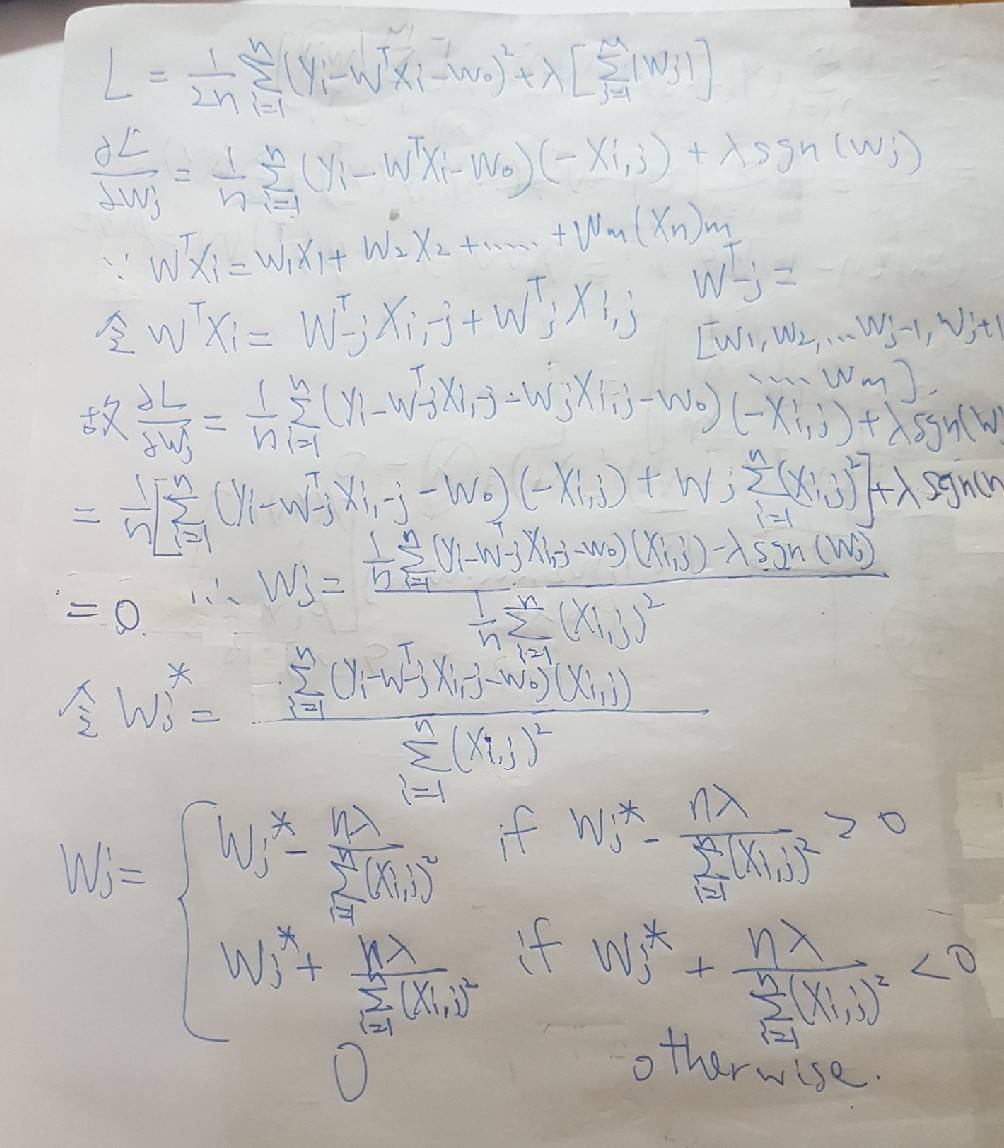

In [5]:
from IPython.core.display import Image, display
display(Image('https://i.imgur.com/Z8uBZFV.jpg', width=700, unconfined=True))

# Q3.2 使用給定骨架建構你的mylasso。

### 將mylasso建構說明分成兩個階段:
### 1.初始化階段:
####     以ridge regression的最佳化w作為w初始值，再利用題目所給的損失函數對w0微分算出最佳化w0，最後再使用前面算出的w0及w依照是否正歸化(L或L')求出損失值
### 2.參數更新階段:
####     使用Coordiniate Descent with Soft Thresholding對w裡的每個值及w0進行max_iter次的更新，值得注意              的是當loss的變化小於tol時，停止更新，回傳過程中最低的L所對應到的權重向量。

In [2]:
from collections import defaultdict

class mylasso:
    def __init__(self, lamcoef=0.1, max_iter=1000, tol=1e-6, const_regu=False):
        """lamcoef: the regularization coefficient
           max_iter: maximum number of iteration for model training
           tol: tolerance for the stopping criteria for model training
           const_regu: whether the constant term should be regularized, default to False
           """
        ### Add your code here ###
        self.lamcoef = lamcoef
        self.max_iter = max_iter
        self.tol = tol
        self.const_regu = const_regu

    def fit(self, x_train, y_train, winit="ridge", keep_traindata=True, verbose=False):
        """Fit a Lasso model
           x_train: a numpy matrix that contains training features
           y_train: a numpy matrix that contains the label
           winit: how weights are initialized, default to "ridge", ridge regression
           keep_traindata: whether the object is going to keep training data after the training process completed
           verbose: output a lot of message"""
        ### Add your code here ###
        self.x_train = x_train
        self.y_train = y_train
        if keep_traindata:
            self.save_xtrain = x_train.copy()
            self.save_ytrain = y_train.copy()
        self.N = x_train.shape[0]
        self.M = x_train.shape[1]
        if winit == 'ridge':
            ## initial w (ridge_regression)
            self.w = np.linalg.inv(
                self.lamcoef * np.identity(self.M) + (np.transpose(self.x_train)).dot(self.x_train)).dot(
                np.transpose(self.x_train).dot(self.y_train))
        ## initial wo (dL/dwo)
        self.w0 = np.sum(self.y_train - (self.w.dot(np.transpose(self.x_train)))) / self.N
        self.calc_loss()
        if verbose:
            self.output_message(winit, keep_traindata)
        for _ in range(self.max_iter):
            old_loss = self.loss
            self.count_zero_weight = 0
            ## update wo 
            if self.const_regu:
                if self.w0 - self.lamcoef > 0:
                    self.w0 -= self.lamcoef
                elif self.w0 + self.lamcoef < 0:
                    self.w0 += self.lamcoef
                else:
                    self.w0 = 0
            for j in range(self.M):
                ## Coordiniate Descent with Soft Thresholding
                w_rm_j = np.delete(self.w, j, 0)
                x_rm_j = np.delete(self.x_train, j, 1)
                w_star = np.sum(
                    (self.y_train - w_rm_j.dot(np.transpose(x_rm_j)) - self.w0).dot(self.x_train[:, j])) / np.sum(
                    (self.x_train[:, j]) ** 2)
                regularization = self.N * self.lamcoef / np.sum((self.x_train[:, j]) ** 2)
                ## update w
                if w_star - regularization > 0:
                    self.w[j] = w_star - regularization
                elif w_star + regularization < 0:
                    self.w[j] = w_star + regularization
                else:
                    self.w[j] = 0
                    self.count_zero_weight += 1
            self.calc_loss()
            ##check the marginal value
            if np.abs(self.loss - old_loss) < self.tol:
                break
        self.prediction_result = self.create_prediction_result_dict(x_train, y_train)

    def predict(self, x_test):
        """Make prediction using trained model"""

        ### Add your code here ###
        ypred = x_test.dot(self.w) + self.w0
        return ypred

    def calc_loss(self):
        self.loss = np.sum((self.y_train - (self.w).dot(np.transpose(self.x_train)) - self.w0) ** 2) / (
                2 * self.N) + self.lamcoef * np.sum(np.abs(self.w))
        if self.const_regu:
            self.loss += self.lamcoef * np.abs(self.w0)

    def output_message(self, winit, keep_traindata):
        if winit == 'ridge':
            print('weights are initialized with ridge regression')
        if keep_traindata:
            print('originated training data was backuped  ')

    @staticmethod
    def calc_mse_and_rmse(pred_data, label_data):
        n = label_data.shape[0]
        MSE = np.sum((pred_data - label_data) ** 2) / n
        RMSE = np.sqrt(MSE)
        return MSE, RMSE

    @staticmethod
    def calc_mae(pred_data, label_data):
        n = label_data.shape[0]
        MAE = np.sum(np.abs(pred_data - label_data)) / n
        return MAE

    def create_prediction_result_dict(self, xtrain, ytrain, result_dict=defaultdict(dict)):
        x_train_pred = self.predict(xtrain)
        MSE, RMSE = self.calc_mse_and_rmse(x_train_pred, ytrain)
        MAE = self.calc_mae(x_train_pred, ytrain)
        result_dict['Training Loss'] = self.loss
        result_dict['Root Mean Squared Error (RMSE) in Training Data'] = RMSE
        result_dict['Mean Absolute Error (MAE) in Training Data'] = MAE
        result_dict['Intercept'] = self.w0
        result_dict['Feature Weights'] = self.w.tolist()
        if self.const_regu:
            if self.w0 == 0:
                result_dict['非零權重的個數'] = dict(w0=0)
            else:
                result_dict['非零權重的個數'] = dict(w0=1)
        result_dict['非零權重的個數'].update(dict(w1=len(self.w) - self.count_zero_weight))
        result_dict['Average Weight Size'] = np.abs(self.w).mean()
        # print(dict(result_dict))
        return dict(result_dict)

# Q3.3 載入資料集，並且使用訓練資料計算Lasso Regression的權重，設定lamcoef = 0.1，其他參數使用預設值。列出Training Loss、Root Mean Squared Error (RMSE) in Training Data、Mean Absolute Error (MAE) in Training Data、Intercept (截距項)、Feature Weights (除了截距項的所有權重)、非零權重的個數。為了讓結果容易閱讀，請使用np.set_printoptions(suppress=True)關閉Scientific Notation。

### 在class中另外寫了create_prediction_result_dict、 calc_mae及calc_mse_and_rmse三個function，將題目要求的數值以dict的方式呈現

In [5]:
from pprint import pprint
np.set_printoptions(suppress=True)
mlo = mylasso(lamcoef=0.1)
mlo.fit(X_train, Y_train)
pprint(mlo.prediction_result)

{'Average Weight Size': 0.2948969820661365,
 'Feature Weights': [4.651855103988746,
                     -2.4567315296086627,
                     -1.061958852762749,
                     0.0,
                     -0.34275053856129684,
                     -2.9485432889821888,
                     0.0,
                     -0.39970267618039435,
                     -0.4265386619866306,
                     0.0,
                     -0.2349865105240499,
                     -0.3949105761862981,
                     0.5030771916752035,
                     0.0,
                     -0.3420789256824973,
                     0.6167458927919346,
                     0.15722752628230408,
                     0.43489924594376306,
                     0.4359537538107826,
                     1.129416606341734,
                     0.4066348090529409,
                     0.0,
                     1.7774360695746616,
                     0.0,
                     -0.16842728307764776,
         

# Q3.4 使用上一小題的模型計算測試資料的預測值。列出前五筆資料的預測年分、Test RMSE、Test MAE。

In [17]:
mlo = mylasso(lamcoef=0.1)
mlo.fit(X_train, Y_train)
ypred = mlo.predict(X_test)
print(f'前5筆資料預測年份:{ypred[:5]}')
print(f'Test資料的RMSE:{mlo.calc_mse_and_rmse(ypred, Y_test)[1]}')
print(f'Test資料的MAE:{mlo.calc_mae(ypred, Y_test)}')

前5筆資料預測年份:[1991.93191145 1999.07198637 2001.76293602 1991.30317029 1994.42657933]
Test資料的RMSE:9.648414790970719
Test資料的MAE:6.921385961496718


# Q3.5 使用下面的 𝜆 訓練模型: 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2。記錄每一個 𝜆 的Training Loss、Number of Nonzero Weights、Average Weight Size (Mean of Absolute Weight)、Training RMSE、Test RMSE。將所有的結果列表、畫折線圖、並寫下你對結果的觀察。

In [21]:
import pandas as pd 

pred_df = pd.DataFrame()
lamcoef = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2]
for coef in lamcoef:
    mlo = mylasso(coef)
    mlo.fit(X_train, Y_train)
    ypred = mlo.predict(X_test)
    Training_Loss = mlo.prediction_result['Training Loss']
    Number_of_Nonzero_Weights = mlo.prediction_result['非零權重的個數']['w1']
    Average_Weight_Size = mlo.prediction_result['Average Weight Size']
    Training_RMSE = mlo.prediction_result['Root Mean Squared Error (RMSE) in Training Data']
    Test_RMSE = mlo.calc_mse_and_rmse(ypred, Y_test)[1]
    coef_df = pd.DataFrame([[Training_Loss, Number_of_Nonzero_Weights, Average_Weight_Size, Training_RMSE, Test_RMSE]], \
                           columns=['Training Loss', 'Number of Nonzero Weights', 'Average Weight Size',
                                    'Training RMSE', 'Test RMSE'], \
                           index=[coef])

    pred_df = pd.concat([pred_df, coef_df])
    

pred_df

,Training Loss,Number of Nonzero Weights,Average Weight Size,Training RMSE,Test RMSE
0.0001,46.570461,90,0.470656,9.650516,9.644374
0.0005,46.587379,90,0.469507,9.650518,9.644092
0.0010,46.608460,90,0.467906,9.650528,9.643539
0.0050,46.774657,89,0.455754,9.650862,9.640064
0.0100,46.976826,87,0.442903,9.651758,9.636408
0.0500,48.417390,76,0.363977,9.672589,9.626434
0.1000,49.888404,59,0.294897,9.719499,9.648415
0.5000,56.375688,16,0.120031,10.096958,9.999131
1.0000,59.889324,4,0.042175,10.591844,10.474621
2.0000,61.492131,1,0.004266,11.020374,10.902614


<ipython-input-22-49957d23d31e>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0][0].set_xticklabels(pred_df.index, rotation=15)
<ipython-input-22-49957d23d31e>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0][1].set_xticklabels(pred_df.index, rotation=15)
<ipython-input-22-49957d23d31e>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0][2].set_xticklabels(pred_df.index, rotation=15)
<ipython-input-22-49957d23d31e>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1][0].set_xticklabels(pred_df.index, rotation=15)
<ipython-input-22-49957d23d31e>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1][1].set_xticklabels(pred_df.index, rotation=15)


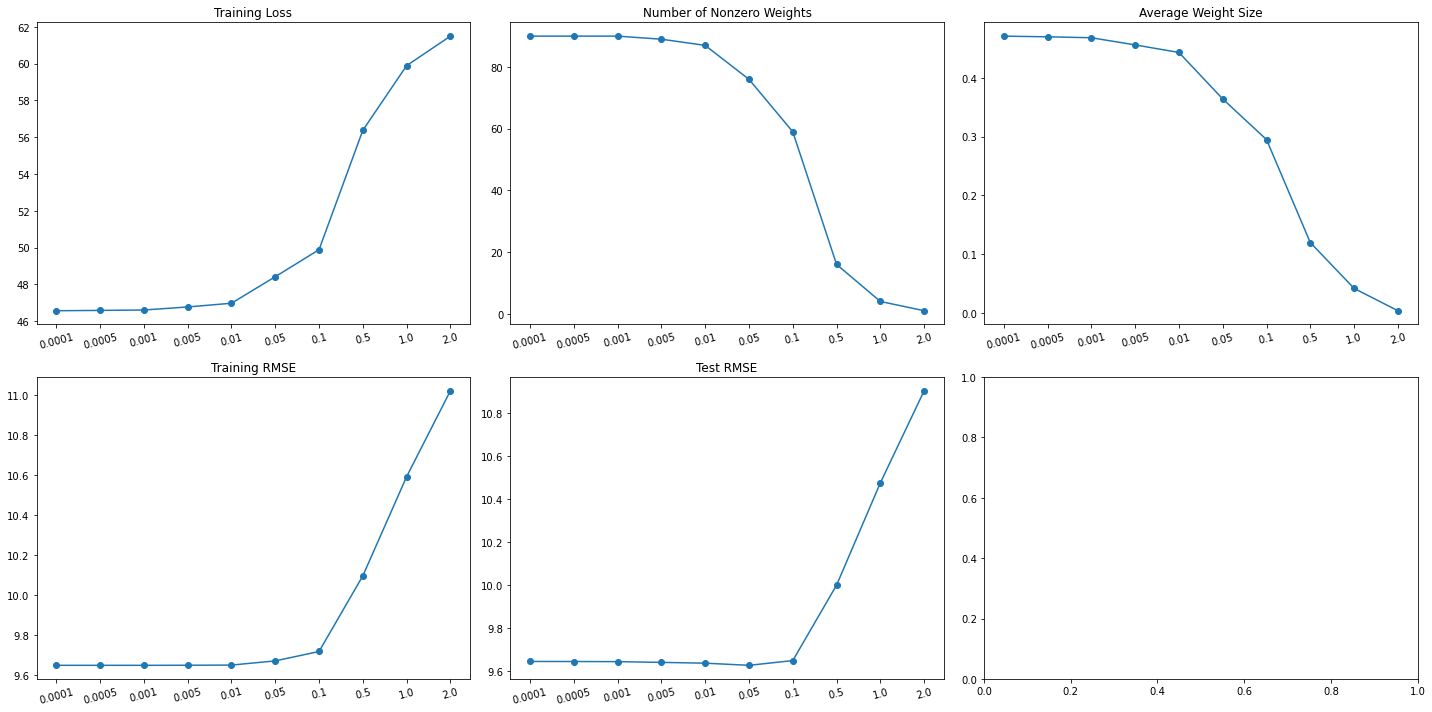

In [22]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
pred_df.index = list(map(str, pred_df.index))
ax[0][0].plot(pred_df.index, pred_df['Training Loss'], 'o-')
ax[0][0].set_title('Training Loss')
ax[0][0].set_xticklabels(pred_df.index, rotation=15)
ax[0][1].plot(pred_df.index, pred_df['Number of Nonzero Weights'], 'o-')
ax[0][1].set_title('Number of Nonzero Weights')
ax[0][1].set_xticklabels(pred_df.index, rotation=15)
ax[0][2].plot(pred_df.index, pred_df['Average Weight Size'], 'o-')
ax[0][2].set_title('Average Weight Size')
ax[0][2].set_xticklabels(pred_df.index, rotation=15)
ax[1][0].plot(pred_df.index, pred_df['Training RMSE'], 'o-')
ax[1][0].set_title('Training RMSE')
ax[1][0].set_xticklabels(pred_df.index, rotation=15)
ax[1][1].plot(pred_df.index, pred_df['Test RMSE'], 'o-')
ax[1][1].set_title('Test RMSE')
ax[1][1].set_xticklabels(pred_df.index, rotation=15)
plt.tight_layout()
plt.show()

# Q3小結: 
####  從以上圖表分析可知lamcoef不宜設的太大，當lamcoef越大時，Train Loss、Training RMSE、Test Loss上升速度越來越快，但從以上圖表卻無法看出應將最適lamcoef取多少，因為Training RMSE 與Test RMSE圖形都不是呈現U字形，只能看出lamcoef越小越精準的趨勢，因此建議可以將lamcoef取更小找出上升的部分，從中找出最適的lamcoef